170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


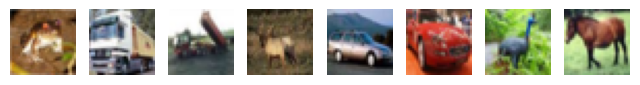

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 77ms/step - accuracy: 0.3922 - loss: 1.6542 - val_accuracy: 0.6025 - val_loss: 1.1124
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 73ms/step - accuracy: 0.6351 - loss: 1.0270 - val_accuracy: 0.6703 - val_loss: 0.9405
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 76ms/step - accuracy: 0.7120 - loss: 0.8239 - val_accuracy: 0.7089 - val_loss: 0.8478
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 75ms/step - accuracy: 0.7543 - loss: 0.7018 - val_accuracy: 0.7338 - val_loss: 0.7893
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.7913 - loss: 0.5963 - val_accuracy: 0.7364 - val_loss: 0.7688
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 75ms/step - accuracy: 0.8229 - loss: 0.5035 - val_accuracy: 0.7298 - val_loss: 0.8138
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.8449 - loss: 0.4381 - val_accuracy: 0.7402 - val_loss: 0.8163
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 

In [ ]:
# Imports
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize and display samples
x_train, x_test = x_train/255.0, x_test/255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(8,2))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

# Train the network
history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test))

# Plot training curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Evaluate and visualize confusion matrix
preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
print("Classification Report:\n",
      classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.show()
